# MNIST Dense Neural Network Example

Train a 2-hidden layers fully connected neural network on manually generated gradient based features.



## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


## Preliminaries

### Imports

In [1]:
import pickle
import shutil

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

import sys
sys.path.append("../..")
import E4525_ML.mnist as mnist

## Data

In [2]:
raw_data_dir="../../raw/MNIST"
data_dir="../../data/digits"
model_dir="../../data/models/tf/DNN_MNIST"

In [3]:
images_filename=raw_data_dir+"/train-images-idx3-ubyte.gz"
labels_filename=raw_data_dir+"/train-labels-idx1-ubyte.gz"

test_images_filename=raw_data_dir+"/t10k-images-idx3-ubyte.gz"
test_labels_filename=raw_data_dir+"/t10k-labels-idx1-ubyte.gz"

images=mnist.read_images(images_filename)
labels=mnist.read_labels(labels_filename)

test_images=mnist.read_images(test_images_filename)
test_labels=mnist.read_labels(test_labels_filename)
    
print(images.shape,labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
images_train,images_val,labels_train,labels_val=train_test_split(images,labels,test_size=0.2)
print(images_train.shape,images_val.shape)

(48000, 28, 28) (12000, 28, 28)


## Generate Image Features

In [5]:
block_size=3
orientations=8

In [6]:
X_train=mnist.image_features(images_train,block_size,orientations)
images_train=None # images not needed anymore, free memory
X_val=mnist.image_features(images_val,block_size,orientations)
images_val=None # images not needed anymore, free memory
print(X_train.shape)

(48000, 800)


In [7]:
D=X_train.shape[1] # number of features

## Define Dense Neural Network

The following class define's the **logit** function $\eta(x)$ as a 2 hidden layer, dense, neural network with `Relu` activation.

In [8]:
def build_model(hidden1,hidden2,D):
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(D,)),
        keras.layers.Dense(hidden1,activation="relu"),
        keras.layers.Dense(hidden2,activation="relu"),
        keras.layers.Dense(10,activation="softmax")
    ])
    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [9]:
model0=build_model(32,16,D)
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 26,330
Trainable params: 26,330
Non-trainable params: 0
_________________________________________________________________


In [10]:
result=model0.fit(X_train,labels_train,validation_data=(X_val,labels_val),epochs=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 39us/step - loss: 0.3838 - acc: 0.8954 - val_loss: 0.1567 - val_acc: 0.9573
Epoch 2/100
48000/48000 [==============================] - ETA: 0s - loss: 0.1295 - acc: 0.962 - 2s 33us/step - loss: 0.1286 - acc: 0.9624 - val_loss: 0.1163 - val_acc: 0.9652
Epoch 3/100
48000/48000 [==============================] - 2s 33us/step - loss: 0.0975 - acc: 0.9710 - val_loss: 0.0903 - val_acc: 0.9729
Epoch 4/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.0828 - acc: 0.9754 - val_loss: 0.0867 - val_acc: 0.9732
Epoch 5/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.0729 - acc: 0.9782 - val_loss: 0.0733 - val_acc: 0.9767
Epoch 6/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.0651 - acc: 0.9799 - val_loss: 0.0834 - val_acc: 0.9732
Epoch 7/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.05

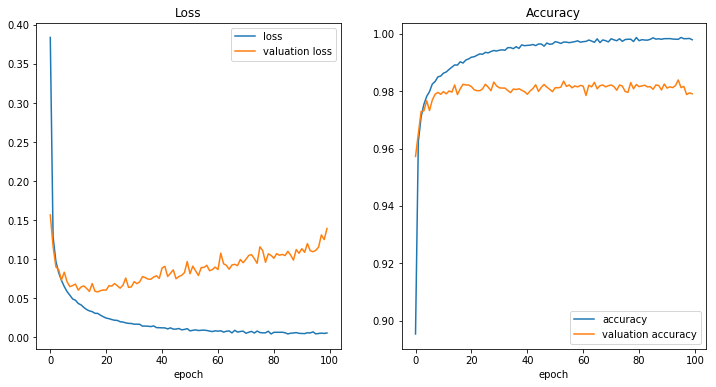

In [11]:
history=result.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [12]:
Y_pred=np.argmax(model0.predict(X_val),axis=1)
np.mean(Y_pred==labels_val)

0.9790833333333333

## Hyper-parameter Search

In [13]:
nepochs=100

In [14]:
results=[]
for hidden1 in [8,16,32,64,128,256,512,1024]:
  for hidden2 in [8,32,64,128,256,512]:
    model0=build_model(hidden1,hidden2,D)
    model0.fit(X_train,labels_train,validation_data=(X_val,labels_val),epochs=nepochs,verbose=2)
    Y_pred=np.argmax(model0.predict(X_val),axis=1)
    acc=np.mean(Y_pred==labels_val)
    results.append((hidden1,hidden2,acc))
    print(">>>>>",hidden1,hidden2,acc,"<<<<<<<<<")

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 2s - loss: 0.8132 - acc: 0.7377 - val_loss: 0.2591 - val_acc: 0.9276
Epoch 2/100
 - 2s - loss: 0.2003 - acc: 0.9440 - val_loss: 0.1614 - val_acc: 0.9553
Epoch 3/100
 - 2s - loss: 0.1458 - acc: 0.9583 - val_loss: 0.1345 - val_acc: 0.9606
Epoch 4/100
 - 1s - loss: 0.1246 - acc: 0.9629 - val_loss: 0.1268 - val_acc: 0.9620
Epoch 5/100
 - 1s - loss: 0.1133 - acc: 0.9664 - val_loss: 0.1119 - val_acc: 0.9666
Epoch 6/100
 - 1s - loss: 0.1044 - acc: 0.9685 - val_loss: 0.1118 - val_acc: 0.9669
Epoch 7/100
 - 1s - loss: 0.0993 - acc: 0.9705 - val_loss: 0.1020 - val_acc: 0.9684
Epoch 8/100
 - 1s - loss: 0.0943 - acc: 0.9713 - val_loss: 0.1021 - val_acc: 0.9692
Epoch 9/100
 - 1s - loss: 0.0909 - acc: 0.9729 - val_loss: 0.0997 - val_acc: 0.9687
Epoch 10/100
 - 1s - loss: 0.0874 - acc: 0.9740 - val_loss: 0.0934 - val_acc: 0.9712
Epoch 11/100
 - 1s - loss: 0.0851 - acc: 0.9742 - val_loss: 0.0894 - val_acc: 0.9728
Epoch 12/100
 - 1s - los

Epoch 97/100
 - 1s - loss: 0.0412 - acc: 0.9868 - val_loss: 0.0760 - val_acc: 0.9783
Epoch 98/100
 - 1s - loss: 0.0418 - acc: 0.9867 - val_loss: 0.0873 - val_acc: 0.9745
Epoch 99/100
 - 1s - loss: 0.0410 - acc: 0.9872 - val_loss: 0.0753 - val_acc: 0.9802
Epoch 100/100
 - 1s - loss: 0.0406 - acc: 0.9870 - val_loss: 0.0808 - val_acc: 0.9772
>>>>> 8 8 0.97725 <<<<<<<<<
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 2s - loss: 0.4947 - acc: 0.8580 - val_loss: 0.1994 - val_acc: 0.9425
Epoch 2/100
 - 1s - loss: 0.1695 - acc: 0.9503 - val_loss: 0.1408 - val_acc: 0.9588
Epoch 3/100
 - 2s - loss: 0.1295 - acc: 0.9623 - val_loss: 0.1205 - val_acc: 0.9663
Epoch 4/100
 - 2s - loss: 0.1096 - acc: 0.9682 - val_loss: 0.1058 - val_acc: 0.9684
Epoch 5/100
 - 1s - loss: 0.0973 - acc: 0.9714 - val_loss: 0.0996 - val_acc: 0.9708
Epoch 6/100
 - 2s - loss: 0.0887 - acc: 0.9733 - val_loss: 0.0932 - val_acc: 0.9728
Epoch 7/100
 - 1s - loss: 0.0829 - acc: 0.9752 - val_loss: 0.0865 - val_acc: 

Epoch 93/100
 - 2s - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0781 - val_acc: 0.9802
Epoch 94/100
 - 1s - loss: 0.0283 - acc: 0.9908 - val_loss: 0.0813 - val_acc: 0.9782
Epoch 95/100
 - 1s - loss: 0.0273 - acc: 0.9910 - val_loss: 0.0779 - val_acc: 0.9781
Epoch 96/100
 - 2s - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0791 - val_acc: 0.9801
Epoch 97/100
 - 1s - loss: 0.0279 - acc: 0.9904 - val_loss: 0.0798 - val_acc: 0.9797
Epoch 98/100
 - 1s - loss: 0.0274 - acc: 0.9914 - val_loss: 0.0765 - val_acc: 0.9810
Epoch 99/100
 - 2s - loss: 0.0282 - acc: 0.9911 - val_loss: 0.0834 - val_acc: 0.9794
Epoch 100/100
 - 2s - loss: 0.0268 - acc: 0.9912 - val_loss: 0.0849 - val_acc: 0.9786
>>>>> 8 32 0.9785833333333334 <<<<<<<<<
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 2s - loss: 0.4118 - acc: 0.8751 - val_loss: 0.1762 - val_acc: 0.9467
Epoch 2/100
 - 2s - loss: 0.1384 - acc: 0.9599 - val_loss: 0.1293 - val_acc: 0.9599
Epoch 3/100
 - 1s - loss: 0.1097 - acc: 0.9671 - val_loss: 0.

Epoch 89/100
 - 2s - loss: 0.0268 - acc: 0.9913 - val_loss: 0.0878 - val_acc: 0.9778
Epoch 90/100
 - 2s - loss: 0.0270 - acc: 0.9911 - val_loss: 0.0840 - val_acc: 0.9773
Epoch 91/100
 - 2s - loss: 0.0267 - acc: 0.9910 - val_loss: 0.0771 - val_acc: 0.9802
Epoch 92/100
 - 2s - loss: 0.0262 - acc: 0.9919 - val_loss: 0.0769 - val_acc: 0.9796
Epoch 93/100
 - 2s - loss: 0.0256 - acc: 0.9912 - val_loss: 0.0828 - val_acc: 0.9789
Epoch 94/100
 - 2s - loss: 0.0261 - acc: 0.9913 - val_loss: 0.0826 - val_acc: 0.9802
Epoch 95/100
 - 2s - loss: 0.0253 - acc: 0.9917 - val_loss: 0.0804 - val_acc: 0.9794
Epoch 96/100
 - 2s - loss: 0.0261 - acc: 0.9919 - val_loss: 0.0799 - val_acc: 0.9805
Epoch 97/100
 - 2s - loss: 0.0254 - acc: 0.9916 - val_loss: 0.0870 - val_acc: 0.9782
Epoch 98/100
 - 2s - loss: 0.0257 - acc: 0.9913 - val_loss: 0.0823 - val_acc: 0.9811
Epoch 99/100
 - 2s - loss: 0.0248 - acc: 0.9915 - val_loss: 0.0796 - val_acc: 0.9802
Epoch 100/100
 - 2s - loss: 0.0250 - acc: 0.9917 - val_loss: 0.08

Epoch 85/100
 - 2s - loss: 0.0234 - acc: 0.9920 - val_loss: 0.0810 - val_acc: 0.9821
Epoch 86/100
 - 2s - loss: 0.0229 - acc: 0.9923 - val_loss: 0.0848 - val_acc: 0.9811
Epoch 87/100
 - 2s - loss: 0.0232 - acc: 0.9918 - val_loss: 0.0886 - val_acc: 0.9802
Epoch 88/100
 - 2s - loss: 0.0214 - acc: 0.9929 - val_loss: 0.0932 - val_acc: 0.9796
Epoch 89/100
 - 2s - loss: 0.0228 - acc: 0.9923 - val_loss: 0.0906 - val_acc: 0.9788
Epoch 90/100
 - 2s - loss: 0.0232 - acc: 0.9922 - val_loss: 0.0902 - val_acc: 0.9794
Epoch 91/100
 - 2s - loss: 0.0215 - acc: 0.9928 - val_loss: 0.0899 - val_acc: 0.9793
Epoch 92/100
 - 2s - loss: 0.0226 - acc: 0.9922 - val_loss: 0.0972 - val_acc: 0.9771
Epoch 93/100
 - 2s - loss: 0.0218 - acc: 0.9927 - val_loss: 0.0953 - val_acc: 0.9791
Epoch 94/100
 - 2s - loss: 0.0225 - acc: 0.9924 - val_loss: 0.0905 - val_acc: 0.9808
Epoch 95/100
 - 2s - loss: 0.0211 - acc: 0.9929 - val_loss: 0.0956 - val_acc: 0.9804
Epoch 96/100
 - 2s - loss: 0.0222 - acc: 0.9924 - val_loss: 0.089

Epoch 81/100
 - 2s - loss: 0.0230 - acc: 0.9923 - val_loss: 0.0903 - val_acc: 0.9803
Epoch 82/100
 - 2s - loss: 0.0234 - acc: 0.9917 - val_loss: 0.0975 - val_acc: 0.9789
Epoch 83/100
 - 2s - loss: 0.0222 - acc: 0.9927 - val_loss: 0.0901 - val_acc: 0.9804
Epoch 84/100
 - 2s - loss: 0.0211 - acc: 0.9925 - val_loss: 0.0977 - val_acc: 0.9800
Epoch 85/100
 - 2s - loss: 0.0236 - acc: 0.9917 - val_loss: 0.0956 - val_acc: 0.9786
Epoch 86/100
 - 2s - loss: 0.0219 - acc: 0.9920 - val_loss: 0.0966 - val_acc: 0.9794
Epoch 87/100
 - 2s - loss: 0.0217 - acc: 0.9923 - val_loss: 0.0947 - val_acc: 0.9803
Epoch 88/100
 - 2s - loss: 0.0214 - acc: 0.9926 - val_loss: 0.1028 - val_acc: 0.9781
Epoch 89/100
 - 2s - loss: 0.0214 - acc: 0.9926 - val_loss: 0.0966 - val_acc: 0.9797
Epoch 90/100
 - 2s - loss: 0.0204 - acc: 0.9926 - val_loss: 0.0929 - val_acc: 0.9812
Epoch 91/100
 - 2s - loss: 0.0207 - acc: 0.9929 - val_loss: 0.0947 - val_acc: 0.9809
Epoch 92/100
 - 2s - loss: 0.0203 - acc: 0.9930 - val_loss: 0.103

Epoch 77/100
 - 2s - loss: 0.0272 - acc: 0.9910 - val_loss: 0.0968 - val_acc: 0.9772
Epoch 78/100
 - 2s - loss: 0.0277 - acc: 0.9904 - val_loss: 0.0867 - val_acc: 0.9798
Epoch 79/100
 - 2s - loss: 0.0273 - acc: 0.9903 - val_loss: 0.0919 - val_acc: 0.9794
Epoch 80/100
 - 2s - loss: 0.0270 - acc: 0.9910 - val_loss: 0.0837 - val_acc: 0.9805
Epoch 81/100
 - 2s - loss: 0.0266 - acc: 0.9911 - val_loss: 0.0806 - val_acc: 0.9816
Epoch 82/100
 - 2s - loss: 0.0269 - acc: 0.9908 - val_loss: 0.0899 - val_acc: 0.9812
Epoch 83/100
 - 2s - loss: 0.0257 - acc: 0.9915 - val_loss: 0.0905 - val_acc: 0.9799
Epoch 84/100
 - 2s - loss: 0.0277 - acc: 0.9905 - val_loss: 0.0928 - val_acc: 0.9803
Epoch 85/100
 - 2s - loss: 0.0258 - acc: 0.9910 - val_loss: 0.0849 - val_acc: 0.9808
Epoch 86/100
 - 2s - loss: 0.0257 - acc: 0.9908 - val_loss: 0.0888 - val_acc: 0.9797
Epoch 87/100
 - 2s - loss: 0.0258 - acc: 0.9912 - val_loss: 0.0851 - val_acc: 0.9804
Epoch 88/100
 - 2s - loss: 0.0242 - acc: 0.9918 - val_loss: 0.089

Epoch 73/100
 - 2s - loss: 0.0240 - acc: 0.9921 - val_loss: 0.0805 - val_acc: 0.9800
Epoch 74/100
 - 2s - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0722 - val_acc: 0.9819
Epoch 75/100
 - 2s - loss: 0.0235 - acc: 0.9922 - val_loss: 0.0854 - val_acc: 0.9783
Epoch 76/100
 - 2s - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0743 - val_acc: 0.9812
Epoch 77/100
 - 2s - loss: 0.0233 - acc: 0.9925 - val_loss: 0.0823 - val_acc: 0.9792
Epoch 78/100
 - 2s - loss: 0.0231 - acc: 0.9923 - val_loss: 0.0806 - val_acc: 0.9792
Epoch 79/100
 - 2s - loss: 0.0229 - acc: 0.9929 - val_loss: 0.0776 - val_acc: 0.9802
Epoch 80/100
 - 2s - loss: 0.0233 - acc: 0.9922 - val_loss: 0.0841 - val_acc: 0.9798
Epoch 81/100
 - 2s - loss: 0.0234 - acc: 0.9924 - val_loss: 0.0790 - val_acc: 0.9801
Epoch 82/100
 - 2s - loss: 0.0221 - acc: 0.9929 - val_loss: 0.0859 - val_acc: 0.9795
Epoch 83/100
 - 2s - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0784 - val_acc: 0.9803
Epoch 84/100
 - 2s - loss: 0.0212 - acc: 0.9929 - val_loss: 0.084

Epoch 69/100
 - 2s - loss: 0.0190 - acc: 0.9934 - val_loss: 0.0813 - val_acc: 0.9824
Epoch 70/100
 - 2s - loss: 0.0172 - acc: 0.9941 - val_loss: 0.0905 - val_acc: 0.9806
Epoch 71/100
 - 2s - loss: 0.0167 - acc: 0.9941 - val_loss: 0.0914 - val_acc: 0.9796
Epoch 72/100
 - 2s - loss: 0.0175 - acc: 0.9942 - val_loss: 0.0925 - val_acc: 0.9819
Epoch 73/100
 - 2s - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0840 - val_acc: 0.9813
Epoch 74/100
 - 2s - loss: 0.0161 - acc: 0.9945 - val_loss: 0.0909 - val_acc: 0.9810
Epoch 75/100
 - 2s - loss: 0.0169 - acc: 0.9943 - val_loss: 0.0916 - val_acc: 0.9816
Epoch 76/100
 - 2s - loss: 0.0171 - acc: 0.9942 - val_loss: 0.0857 - val_acc: 0.9816
Epoch 77/100
 - 2s - loss: 0.0161 - acc: 0.9946 - val_loss: 0.0878 - val_acc: 0.9811
Epoch 78/100
 - 2s - loss: 0.0164 - acc: 0.9945 - val_loss: 0.0881 - val_acc: 0.9822
Epoch 79/100
 - 2s - loss: 0.0160 - acc: 0.9949 - val_loss: 0.0860 - val_acc: 0.9822
Epoch 80/100
 - 2s - loss: 0.0160 - acc: 0.9948 - val_loss: 0.085

Epoch 65/100
 - 2s - loss: 0.0131 - acc: 0.9955 - val_loss: 0.0867 - val_acc: 0.9818
Epoch 66/100
 - 2s - loss: 0.0120 - acc: 0.9962 - val_loss: 0.0895 - val_acc: 0.9830
Epoch 67/100
 - 2s - loss: 0.0120 - acc: 0.9959 - val_loss: 0.1047 - val_acc: 0.9810
Epoch 68/100
 - 2s - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0887 - val_acc: 0.9834
Epoch 69/100
 - 2s - loss: 0.0111 - acc: 0.9961 - val_loss: 0.0873 - val_acc: 0.9824
Epoch 70/100
 - 2s - loss: 0.0118 - acc: 0.9958 - val_loss: 0.0922 - val_acc: 0.9824
Epoch 71/100
 - 2s - loss: 0.0110 - acc: 0.9962 - val_loss: 0.0882 - val_acc: 0.9825
Epoch 72/100
 - 2s - loss: 0.0132 - acc: 0.9958 - val_loss: 0.0852 - val_acc: 0.9834
Epoch 73/100
 - 2s - loss: 0.0104 - acc: 0.9965 - val_loss: 0.0855 - val_acc: 0.9839
Epoch 74/100
 - 2s - loss: 0.0103 - acc: 0.9965 - val_loss: 0.0938 - val_acc: 0.9816
Epoch 75/100
 - 2s - loss: 0.0113 - acc: 0.9961 - val_loss: 0.0874 - val_acc: 0.9838
Epoch 76/100
 - 2s - loss: 0.0089 - acc: 0.9971 - val_loss: 0.092

Epoch 61/100
 - 2s - loss: 0.0110 - acc: 0.9959 - val_loss: 0.0939 - val_acc: 0.9823
Epoch 62/100
 - 2s - loss: 0.0104 - acc: 0.9966 - val_loss: 0.1038 - val_acc: 0.9798
Epoch 63/100
 - 2s - loss: 0.0099 - acc: 0.9965 - val_loss: 0.0958 - val_acc: 0.9819
Epoch 64/100
 - 2s - loss: 0.0087 - acc: 0.9973 - val_loss: 0.1011 - val_acc: 0.9808
Epoch 65/100
 - 2s - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0982 - val_acc: 0.9812
Epoch 66/100
 - 2s - loss: 0.0090 - acc: 0.9970 - val_loss: 0.0966 - val_acc: 0.9813
Epoch 67/100
 - 2s - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0942 - val_acc: 0.9817
Epoch 68/100
 - 2s - loss: 0.0084 - acc: 0.9972 - val_loss: 0.0902 - val_acc: 0.9832
Epoch 69/100
 - 2s - loss: 0.0096 - acc: 0.9970 - val_loss: 0.1005 - val_acc: 0.9820
Epoch 70/100
 - 2s - loss: 0.0082 - acc: 0.9970 - val_loss: 0.0949 - val_acc: 0.9822
Epoch 71/100
 - 2s - loss: 0.0090 - acc: 0.9970 - val_loss: 0.0940 - val_acc: 0.9831
Epoch 72/100
 - 2s - loss: 0.0078 - acc: 0.9975 - val_loss: 0.093

Epoch 57/100
 - 2s - loss: 0.0120 - acc: 0.9958 - val_loss: 0.0861 - val_acc: 0.9834
Epoch 58/100
 - 2s - loss: 0.0093 - acc: 0.9969 - val_loss: 0.0816 - val_acc: 0.9841
Epoch 59/100
 - 2s - loss: 0.0100 - acc: 0.9965 - val_loss: 0.1022 - val_acc: 0.9820
Epoch 60/100
 - 2s - loss: 0.0112 - acc: 0.9960 - val_loss: 0.0990 - val_acc: 0.9816
Epoch 61/100
 - 2s - loss: 0.0097 - acc: 0.9966 - val_loss: 0.0957 - val_acc: 0.9832
Epoch 62/100
 - 2s - loss: 0.0108 - acc: 0.9963 - val_loss: 0.0888 - val_acc: 0.9827
Epoch 63/100
 - 2s - loss: 0.0074 - acc: 0.9976 - val_loss: 0.0972 - val_acc: 0.9823
Epoch 64/100
 - 2s - loss: 0.0113 - acc: 0.9964 - val_loss: 0.0974 - val_acc: 0.9838
Epoch 65/100
 - 2s - loss: 0.0087 - acc: 0.9968 - val_loss: 0.1087 - val_acc: 0.9806
Epoch 66/100
 - 2s - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0915 - val_acc: 0.9832
Epoch 67/100
 - 2s - loss: 0.0082 - acc: 0.9974 - val_loss: 0.0891 - val_acc: 0.9836
Epoch 68/100
 - 2s - loss: 0.0085 - acc: 0.9975 - val_loss: 0.091

Epoch 53/100
 - 2s - loss: 0.0127 - acc: 0.9960 - val_loss: 0.0981 - val_acc: 0.9820
Epoch 54/100
 - 2s - loss: 0.0075 - acc: 0.9975 - val_loss: 0.1036 - val_acc: 0.9828
Epoch 55/100
 - 2s - loss: 0.0112 - acc: 0.9966 - val_loss: 0.1087 - val_acc: 0.9810
Epoch 56/100
 - 2s - loss: 0.0094 - acc: 0.9966 - val_loss: 0.0999 - val_acc: 0.9836
Epoch 57/100
 - 2s - loss: 0.0093 - acc: 0.9968 - val_loss: 0.1000 - val_acc: 0.9837
Epoch 58/100
 - 2s - loss: 0.0097 - acc: 0.9966 - val_loss: 0.1117 - val_acc: 0.9820
Epoch 59/100
 - 2s - loss: 0.0086 - acc: 0.9969 - val_loss: 0.1144 - val_acc: 0.9823
Epoch 60/100
 - 2s - loss: 0.0092 - acc: 0.9968 - val_loss: 0.1157 - val_acc: 0.9815
Epoch 61/100
 - 2s - loss: 0.0081 - acc: 0.9972 - val_loss: 0.1047 - val_acc: 0.9829
Epoch 62/100
 - 2s - loss: 0.0064 - acc: 0.9980 - val_loss: 0.1023 - val_acc: 0.9842
Epoch 63/100
 - 2s - loss: 0.0118 - acc: 0.9962 - val_loss: 0.1063 - val_acc: 0.9836
Epoch 64/100
 - 2s - loss: 0.0060 - acc: 0.9980 - val_loss: 0.113

Epoch 49/100
 - 2s - loss: 0.0101 - acc: 0.9968 - val_loss: 0.0887 - val_acc: 0.9812
Epoch 50/100
 - 2s - loss: 0.0091 - acc: 0.9970 - val_loss: 0.0997 - val_acc: 0.9799
Epoch 51/100
 - 2s - loss: 0.0098 - acc: 0.9966 - val_loss: 0.0914 - val_acc: 0.9816
Epoch 52/100
 - 2s - loss: 0.0080 - acc: 0.9976 - val_loss: 0.0885 - val_acc: 0.9816
Epoch 53/100
 - 2s - loss: 0.0091 - acc: 0.9972 - val_loss: 0.0901 - val_acc: 0.9818
Epoch 54/100
 - 2s - loss: 0.0077 - acc: 0.9979 - val_loss: 0.0924 - val_acc: 0.9821
Epoch 55/100
 - 2s - loss: 0.0099 - acc: 0.9969 - val_loss: 0.0951 - val_acc: 0.9823
Epoch 56/100
 - 2s - loss: 0.0072 - acc: 0.9977 - val_loss: 0.0889 - val_acc: 0.9818
Epoch 57/100
 - 2s - loss: 0.0080 - acc: 0.9976 - val_loss: 0.1042 - val_acc: 0.9798
Epoch 58/100
 - 2s - loss: 0.0072 - acc: 0.9976 - val_loss: 0.1056 - val_acc: 0.9792
Epoch 59/100
 - 2s - loss: 0.0095 - acc: 0.9968 - val_loss: 0.0971 - val_acc: 0.9816
Epoch 60/100
 - 2s - loss: 0.0061 - acc: 0.9980 - val_loss: 0.104

Epoch 45/100
 - 2s - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0820 - val_acc: 0.9829
Epoch 46/100
 - 2s - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0825 - val_acc: 0.9829
Epoch 47/100
 - 2s - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0873 - val_acc: 0.9825
Epoch 48/100
 - 2s - loss: 0.0099 - acc: 0.9966 - val_loss: 0.0878 - val_acc: 0.9819
Epoch 49/100
 - 2s - loss: 0.0095 - acc: 0.9970 - val_loss: 0.0867 - val_acc: 0.9819
Epoch 50/100
 - 2s - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0912 - val_acc: 0.9824
Epoch 51/100
 - 2s - loss: 0.0088 - acc: 0.9970 - val_loss: 0.0897 - val_acc: 0.9815
Epoch 52/100
 - 2s - loss: 0.0083 - acc: 0.9971 - val_loss: 0.0906 - val_acc: 0.9826
Epoch 53/100
 - 2s - loss: 0.0093 - acc: 0.9970 - val_loss: 0.0918 - val_acc: 0.9814
Epoch 54/100
 - 2s - loss: 0.0090 - acc: 0.9970 - val_loss: 0.0939 - val_acc: 0.9824
Epoch 55/100
 - 2s - loss: 0.0069 - acc: 0.9979 - val_loss: 0.0852 - val_acc: 0.9828
Epoch 56/100
 - 2s - loss: 0.0092 - acc: 0.9971 - val_loss: 0.092

Epoch 41/100
 - 2s - loss: 0.0095 - acc: 0.9969 - val_loss: 0.0846 - val_acc: 0.9825
Epoch 42/100
 - 2s - loss: 0.0093 - acc: 0.9968 - val_loss: 0.0910 - val_acc: 0.9828
Epoch 43/100
 - 2s - loss: 0.0083 - acc: 0.9973 - val_loss: 0.0945 - val_acc: 0.9819
Epoch 44/100
 - 2s - loss: 0.0086 - acc: 0.9969 - val_loss: 0.0904 - val_acc: 0.9838
Epoch 45/100
 - 2s - loss: 0.0084 - acc: 0.9971 - val_loss: 0.0863 - val_acc: 0.9842
Epoch 46/100
 - 2s - loss: 0.0087 - acc: 0.9971 - val_loss: 0.1017 - val_acc: 0.9805
Epoch 47/100
 - 2s - loss: 0.0072 - acc: 0.9976 - val_loss: 0.0906 - val_acc: 0.9825
Epoch 48/100
 - 2s - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0883 - val_acc: 0.9846
Epoch 49/100
 - 2s - loss: 0.0079 - acc: 0.9972 - val_loss: 0.0931 - val_acc: 0.9832
Epoch 50/100
 - 2s - loss: 0.0059 - acc: 0.9981 - val_loss: 0.1011 - val_acc: 0.9837
Epoch 51/100
 - 2s - loss: 0.0100 - acc: 0.9966 - val_loss: 0.0939 - val_acc: 0.9845
Epoch 52/100
 - 2s - loss: 0.0065 - acc: 0.9978 - val_loss: 0.101

Epoch 37/100
 - 2s - loss: 0.0097 - acc: 0.9970 - val_loss: 0.0859 - val_acc: 0.9840
Epoch 38/100
 - 2s - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0984 - val_acc: 0.9807
Epoch 39/100
 - 2s - loss: 0.0089 - acc: 0.9970 - val_loss: 0.0904 - val_acc: 0.9827
Epoch 40/100
 - 2s - loss: 0.0089 - acc: 0.9966 - val_loss: 0.0891 - val_acc: 0.9842
Epoch 41/100
 - 2s - loss: 0.0103 - acc: 0.9965 - val_loss: 0.0838 - val_acc: 0.9846
Epoch 42/100
 - 2s - loss: 0.0086 - acc: 0.9970 - val_loss: 0.1021 - val_acc: 0.9805
Epoch 43/100
 - 2s - loss: 0.0096 - acc: 0.9967 - val_loss: 0.0917 - val_acc: 0.9841
Epoch 44/100
 - 2s - loss: 0.0087 - acc: 0.9973 - val_loss: 0.1127 - val_acc: 0.9789
Epoch 45/100
 - 3s - loss: 0.0083 - acc: 0.9971 - val_loss: 0.0946 - val_acc: 0.9832
Epoch 46/100
 - 2s - loss: 0.0075 - acc: 0.9975 - val_loss: 0.0973 - val_acc: 0.9847
Epoch 47/100
 - 2s - loss: 0.0080 - acc: 0.9971 - val_loss: 0.1004 - val_acc: 0.9828
Epoch 48/100
 - 2s - loss: 0.0070 - acc: 0.9978 - val_loss: 0.096

Epoch 33/100
 - 3s - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0838 - val_acc: 0.9830
Epoch 34/100
 - 3s - loss: 0.0102 - acc: 0.9964 - val_loss: 0.0837 - val_acc: 0.9839
Epoch 35/100
 - 3s - loss: 0.0077 - acc: 0.9975 - val_loss: 0.0766 - val_acc: 0.9851
Epoch 36/100
 - 3s - loss: 0.0115 - acc: 0.9967 - val_loss: 0.0809 - val_acc: 0.9849
Epoch 37/100
 - 3s - loss: 0.0090 - acc: 0.9969 - val_loss: 0.0876 - val_acc: 0.9846
Epoch 38/100
 - 3s - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0902 - val_acc: 0.9824
Epoch 39/100
 - 3s - loss: 0.0081 - acc: 0.9974 - val_loss: 0.0945 - val_acc: 0.9837
Epoch 40/100
 - 3s - loss: 0.0074 - acc: 0.9975 - val_loss: 0.0887 - val_acc: 0.9841
Epoch 41/100
 - 3s - loss: 0.0086 - acc: 0.9972 - val_loss: 0.1095 - val_acc: 0.9818
Epoch 42/100
 - 3s - loss: 0.0074 - acc: 0.9978 - val_loss: 0.0940 - val_acc: 0.9823
Epoch 43/100
 - 3s - loss: 0.0061 - acc: 0.9979 - val_loss: 0.1144 - val_acc: 0.9818
Epoch 44/100
 - 3s - loss: 0.0093 - acc: 0.9970 - val_loss: 0.114

Epoch 29/100
 - 3s - loss: 0.0126 - acc: 0.9961 - val_loss: 0.0860 - val_acc: 0.9839
Epoch 30/100
 - 3s - loss: 0.0098 - acc: 0.9966 - val_loss: 0.0812 - val_acc: 0.9851
Epoch 31/100
 - 3s - loss: 0.0106 - acc: 0.9962 - val_loss: 0.1024 - val_acc: 0.9825
Epoch 32/100
 - 3s - loss: 0.0102 - acc: 0.9966 - val_loss: 0.0947 - val_acc: 0.9833
Epoch 33/100
 - 3s - loss: 0.0070 - acc: 0.9977 - val_loss: 0.1024 - val_acc: 0.9826
Epoch 34/100
 - 3s - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0921 - val_acc: 0.9848
Epoch 35/100
 - 3s - loss: 0.0098 - acc: 0.9968 - val_loss: 0.0894 - val_acc: 0.9862
Epoch 36/100
 - 3s - loss: 0.0083 - acc: 0.9973 - val_loss: 0.0861 - val_acc: 0.9853
Epoch 37/100
 - 3s - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0844 - val_acc: 0.9858
Epoch 38/100
 - 3s - loss: 0.0094 - acc: 0.9970 - val_loss: 0.1009 - val_acc: 0.9832
Epoch 39/100
 - 3s - loss: 0.0077 - acc: 0.9976 - val_loss: 0.0973 - val_acc: 0.9830
Epoch 40/100
 - 3s - loss: 0.0072 - acc: 0.9977 - val_loss: 0.088

Epoch 25/100
 - 3s - loss: 0.0117 - acc: 0.9963 - val_loss: 0.0647 - val_acc: 0.9838
Epoch 26/100
 - 3s - loss: 0.0110 - acc: 0.9962 - val_loss: 0.0734 - val_acc: 0.9813
Epoch 27/100
 - 3s - loss: 0.0111 - acc: 0.9961 - val_loss: 0.0655 - val_acc: 0.9849
Epoch 28/100
 - 3s - loss: 0.0102 - acc: 0.9968 - val_loss: 0.0649 - val_acc: 0.9849
Epoch 29/100
 - 3s - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0705 - val_acc: 0.9842
Epoch 30/100
 - 3s - loss: 0.0081 - acc: 0.9972 - val_loss: 0.0754 - val_acc: 0.9832
Epoch 31/100
 - 3s - loss: 0.0092 - acc: 0.9970 - val_loss: 0.0774 - val_acc: 0.9814
Epoch 32/100
 - 3s - loss: 0.0088 - acc: 0.9970 - val_loss: 0.0849 - val_acc: 0.9804
Epoch 33/100
 - 3s - loss: 0.0082 - acc: 0.9973 - val_loss: 0.0764 - val_acc: 0.9838
Epoch 34/100
 - 3s - loss: 0.0080 - acc: 0.9971 - val_loss: 0.0755 - val_acc: 0.9838
Epoch 35/100
 - 3s - loss: 0.0068 - acc: 0.9976 - val_loss: 0.0798 - val_acc: 0.9838
Epoch 36/100
 - 3s - loss: 0.0073 - acc: 0.9976 - val_loss: 0.072

Epoch 21/100
 - 3s - loss: 0.0141 - acc: 0.9951 - val_loss: 0.0697 - val_acc: 0.9842
Epoch 22/100
 - 3s - loss: 0.0129 - acc: 0.9955 - val_loss: 0.0696 - val_acc: 0.9843
Epoch 23/100
 - 3s - loss: 0.0114 - acc: 0.9960 - val_loss: 0.0715 - val_acc: 0.9837
Epoch 24/100
 - 3s - loss: 0.0118 - acc: 0.9959 - val_loss: 0.0719 - val_acc: 0.9844
Epoch 25/100
 - 3s - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0786 - val_acc: 0.9836
Epoch 26/100
 - 3s - loss: 0.0110 - acc: 0.9960 - val_loss: 0.0834 - val_acc: 0.9832
Epoch 27/100
 - 3s - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0753 - val_acc: 0.9843
Epoch 28/100
 - 3s - loss: 0.0093 - acc: 0.9968 - val_loss: 0.0728 - val_acc: 0.9837
Epoch 29/100
 - 3s - loss: 0.0076 - acc: 0.9974 - val_loss: 0.0920 - val_acc: 0.9809
Epoch 30/100
 - 3s - loss: 0.0100 - acc: 0.9967 - val_loss: 0.0948 - val_acc: 0.9792
Epoch 31/100
 - 3s - loss: 0.0087 - acc: 0.9970 - val_loss: 0.0842 - val_acc: 0.9842
Epoch 32/100
 - 3s - loss: 0.0080 - acc: 0.9974 - val_loss: 0.098

Epoch 17/100
 - 3s - loss: 0.0154 - acc: 0.9950 - val_loss: 0.0698 - val_acc: 0.9836
Epoch 18/100
 - 3s - loss: 0.0155 - acc: 0.9948 - val_loss: 0.0799 - val_acc: 0.9822
Epoch 19/100
 - 3s - loss: 0.0131 - acc: 0.9957 - val_loss: 0.0740 - val_acc: 0.9832
Epoch 20/100
 - 3s - loss: 0.0138 - acc: 0.9953 - val_loss: 0.0760 - val_acc: 0.9830
Epoch 21/100
 - 3s - loss: 0.0122 - acc: 0.9960 - val_loss: 0.0724 - val_acc: 0.9838
Epoch 22/100
 - 3s - loss: 0.0109 - acc: 0.9966 - val_loss: 0.0977 - val_acc: 0.9796
Epoch 23/100
 - 3s - loss: 0.0139 - acc: 0.9955 - val_loss: 0.0745 - val_acc: 0.9848
Epoch 24/100
 - 3s - loss: 0.0102 - acc: 0.9968 - val_loss: 0.0805 - val_acc: 0.9825
Epoch 25/100
 - 3s - loss: 0.0108 - acc: 0.9963 - val_loss: 0.0817 - val_acc: 0.9838
Epoch 26/100
 - 3s - loss: 0.0097 - acc: 0.9967 - val_loss: 0.0814 - val_acc: 0.9823
Epoch 27/100
 - 3s - loss: 0.0093 - acc: 0.9969 - val_loss: 0.0766 - val_acc: 0.9842
Epoch 28/100
 - 3s - loss: 0.0097 - acc: 0.9969 - val_loss: 0.088

Epoch 13/100
 - 3s - loss: 0.0188 - acc: 0.9941 - val_loss: 0.0675 - val_acc: 0.9815
Epoch 14/100
 - 3s - loss: 0.0181 - acc: 0.9939 - val_loss: 0.0689 - val_acc: 0.9824
Epoch 15/100
 - 3s - loss: 0.0167 - acc: 0.9944 - val_loss: 0.0685 - val_acc: 0.9831
Epoch 16/100
 - 3s - loss: 0.0163 - acc: 0.9945 - val_loss: 0.0633 - val_acc: 0.9838
Epoch 17/100
 - 4s - loss: 0.0145 - acc: 0.9949 - val_loss: 0.0591 - val_acc: 0.9867
Epoch 18/100
 - 4s - loss: 0.0143 - acc: 0.9951 - val_loss: 0.0723 - val_acc: 0.9832
Epoch 19/100
 - 3s - loss: 0.0129 - acc: 0.9957 - val_loss: 0.0702 - val_acc: 0.9829
Epoch 20/100
 - 3s - loss: 0.0108 - acc: 0.9965 - val_loss: 0.0681 - val_acc: 0.9842
Epoch 21/100
 - 3s - loss: 0.0117 - acc: 0.9963 - val_loss: 0.0691 - val_acc: 0.9854
Epoch 22/100
 - 3s - loss: 0.0113 - acc: 0.9961 - val_loss: 0.0751 - val_acc: 0.9848
Epoch 23/100
 - 3s - loss: 0.0114 - acc: 0.9961 - val_loss: 0.0755 - val_acc: 0.9842
Epoch 24/100
 - 3s - loss: 0.0106 - acc: 0.9967 - val_loss: 0.081

Epoch 9/100
 - 4s - loss: 0.0272 - acc: 0.9905 - val_loss: 0.0582 - val_acc: 0.9835
Epoch 10/100
 - 4s - loss: 0.0235 - acc: 0.9925 - val_loss: 0.0645 - val_acc: 0.9816
Epoch 11/100
 - 4s - loss: 0.0214 - acc: 0.9928 - val_loss: 0.0862 - val_acc: 0.9784
Epoch 12/100
 - 4s - loss: 0.0206 - acc: 0.9926 - val_loss: 0.0789 - val_acc: 0.9802
Epoch 13/100
 - 4s - loss: 0.0192 - acc: 0.9938 - val_loss: 0.0641 - val_acc: 0.9840
Epoch 14/100
 - 4s - loss: 0.0168 - acc: 0.9940 - val_loss: 0.0688 - val_acc: 0.9828
Epoch 15/100
 - 4s - loss: 0.0166 - acc: 0.9942 - val_loss: 0.0623 - val_acc: 0.9844
Epoch 16/100
 - 4s - loss: 0.0139 - acc: 0.9951 - val_loss: 0.0752 - val_acc: 0.9814
Epoch 17/100
 - 4s - loss: 0.0144 - acc: 0.9949 - val_loss: 0.0706 - val_acc: 0.9836
Epoch 18/100
 - 4s - loss: 0.0117 - acc: 0.9963 - val_loss: 0.0857 - val_acc: 0.9828
Epoch 19/100
 - 4s - loss: 0.0126 - acc: 0.9956 - val_loss: 0.0638 - val_acc: 0.9858
Epoch 20/100
 - 4s - loss: 0.0132 - acc: 0.9956 - val_loss: 0.0780

Epoch 5/100
 - 4s - loss: 0.0459 - acc: 0.9848 - val_loss: 0.0740 - val_acc: 0.9784
Epoch 6/100
 - 4s - loss: 0.0392 - acc: 0.9875 - val_loss: 0.0621 - val_acc: 0.9822
Epoch 7/100
 - 4s - loss: 0.0338 - acc: 0.9893 - val_loss: 0.0737 - val_acc: 0.9780
Epoch 8/100
 - 4s - loss: 0.0304 - acc: 0.9895 - val_loss: 0.0756 - val_acc: 0.9802
Epoch 9/100
 - 4s - loss: 0.0271 - acc: 0.9911 - val_loss: 0.0648 - val_acc: 0.9829
Epoch 10/100
 - 4s - loss: 0.0243 - acc: 0.9917 - val_loss: 0.0647 - val_acc: 0.9839
Epoch 11/100
 - 4s - loss: 0.0211 - acc: 0.9929 - val_loss: 0.0779 - val_acc: 0.9818
Epoch 12/100
 - 4s - loss: 0.0207 - acc: 0.9926 - val_loss: 0.0724 - val_acc: 0.9837
Epoch 13/100
 - 4s - loss: 0.0180 - acc: 0.9939 - val_loss: 0.0637 - val_acc: 0.9852
Epoch 14/100
 - 4s - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0650 - val_acc: 0.9835
Epoch 15/100
 - 4s - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0745 - val_acc: 0.9809
Epoch 16/100
 - 4s - loss: 0.0168 - acc: 0.9942 - val_loss: 0.0798 - v

 - 6s - loss: 0.3453 - acc: 0.9033 - val_loss: 0.1736 - val_acc: 0.9483
Epoch 2/100
 - 4s - loss: 0.1133 - acc: 0.9667 - val_loss: 0.0984 - val_acc: 0.9718
Epoch 3/100
 - 5s - loss: 0.0836 - acc: 0.9746 - val_loss: 0.0785 - val_acc: 0.9768
Epoch 4/100
 - 4s - loss: 0.0682 - acc: 0.9789 - val_loss: 0.0829 - val_acc: 0.9745
Epoch 5/100
 - 4s - loss: 0.0566 - acc: 0.9830 - val_loss: 0.0665 - val_acc: 0.9795
Epoch 6/100
 - 4s - loss: 0.0499 - acc: 0.9841 - val_loss: 0.0632 - val_acc: 0.9807
Epoch 7/100
 - 4s - loss: 0.0425 - acc: 0.9865 - val_loss: 0.0671 - val_acc: 0.9802
Epoch 8/100
 - 4s - loss: 0.0375 - acc: 0.9884 - val_loss: 0.0662 - val_acc: 0.9812
Epoch 9/100
 - 4s - loss: 0.0334 - acc: 0.9894 - val_loss: 0.0718 - val_acc: 0.9782
Epoch 10/100
 - 4s - loss: 0.0294 - acc: 0.9906 - val_loss: 0.0588 - val_acc: 0.9828
Epoch 11/100
 - 4s - loss: 0.0269 - acc: 0.9916 - val_loss: 0.0587 - val_acc: 0.9823
Epoch 12/100
 - 4s - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0615 - val_acc: 0.9828
E

Epoch 98/100
 - 4s - loss: 0.0011 - acc: 0.9997 - val_loss: 0.1117 - val_acc: 0.9848
Epoch 99/100
 - 4s - loss: 0.0046 - acc: 0.9986 - val_loss: 0.1294 - val_acc: 0.9828
Epoch 100/100
 - 4s - loss: 0.0032 - acc: 0.9992 - val_loss: 0.1200 - val_acc: 0.9838
>>>>> 128 8 0.9838333333333333 <<<<<<<<<
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 6s - loss: 0.2321 - acc: 0.9357 - val_loss: 0.1010 - val_acc: 0.9687
Epoch 2/100
 - 4s - loss: 0.0875 - acc: 0.9740 - val_loss: 0.0735 - val_acc: 0.9770
Epoch 3/100
 - 4s - loss: 0.0653 - acc: 0.9801 - val_loss: 0.0769 - val_acc: 0.9750
Epoch 4/100
 - 4s - loss: 0.0539 - acc: 0.9832 - val_loss: 0.0572 - val_acc: 0.9813
Epoch 5/100
 - 4s - loss: 0.0445 - acc: 0.9861 - val_loss: 0.0563 - val_acc: 0.9825
Epoch 6/100
 - 4s - loss: 0.0385 - acc: 0.9875 - val_loss: 0.0575 - val_acc: 0.9822
Epoch 7/100
 - 4s - loss: 0.0330 - acc: 0.9889 - val_loss: 0.0540 - val_acc: 0.9848
Epoch 8/100
 - 4s - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0593

Epoch 94/100
 - 5s - loss: 0.0047 - acc: 0.9990 - val_loss: 0.1266 - val_acc: 0.9837
Epoch 95/100
 - 4s - loss: 0.0035 - acc: 0.9992 - val_loss: 0.1272 - val_acc: 0.9841
Epoch 96/100
 - 4s - loss: 0.0043 - acc: 0.9989 - val_loss: 0.1442 - val_acc: 0.9825
Epoch 97/100
 - 4s - loss: 0.0032 - acc: 0.9991 - val_loss: 0.1247 - val_acc: 0.9851
Epoch 98/100
 - 4s - loss: 0.0028 - acc: 0.9991 - val_loss: 0.1258 - val_acc: 0.9857
Epoch 99/100
 - 4s - loss: 0.0039 - acc: 0.9991 - val_loss: 0.1309 - val_acc: 0.9840
Epoch 100/100
 - 4s - loss: 0.0037 - acc: 0.9990 - val_loss: 0.1321 - val_acc: 0.9844
>>>>> 128 32 0.9844166666666667 <<<<<<<<<
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 6s - loss: 0.2197 - acc: 0.9386 - val_loss: 0.1051 - val_acc: 0.9683
Epoch 2/100
 - 5s - loss: 0.0854 - acc: 0.9744 - val_loss: 0.0781 - val_acc: 0.9753
Epoch 3/100
 - 5s - loss: 0.0639 - acc: 0.9803 - val_loss: 0.0672 - val_acc: 0.9789
Epoch 4/100
 - 5s - loss: 0.0523 - acc: 0.9833 - val_loss: 0

Epoch 90/100
 - 5s - loss: 0.0024 - acc: 0.9991 - val_loss: 0.1069 - val_acc: 0.9862
Epoch 91/100
 - 5s - loss: 0.0037 - acc: 0.9990 - val_loss: 0.1131 - val_acc: 0.9871
Epoch 92/100
 - 5s - loss: 0.0052 - acc: 0.9988 - val_loss: 0.1209 - val_acc: 0.9853
Epoch 93/100
 - 5s - loss: 0.0035 - acc: 0.9991 - val_loss: 0.1243 - val_acc: 0.9854
Epoch 94/100
 - 5s - loss: 0.0025 - acc: 0.9993 - val_loss: 0.1175 - val_acc: 0.9845
Epoch 95/100
 - 5s - loss: 0.0029 - acc: 0.9991 - val_loss: 0.1468 - val_acc: 0.9836
Epoch 96/100
 - 5s - loss: 0.0030 - acc: 0.9990 - val_loss: 0.1314 - val_acc: 0.9852
Epoch 97/100
 - 5s - loss: 0.0016 - acc: 0.9995 - val_loss: 0.1350 - val_acc: 0.9851
Epoch 98/100
 - 5s - loss: 0.0046 - acc: 0.9988 - val_loss: 0.1239 - val_acc: 0.9860
Epoch 99/100
 - 5s - loss: 0.0019 - acc: 0.9993 - val_loss: 0.1273 - val_acc: 0.9854
Epoch 100/100
 - 4s - loss: 0.0038 - acc: 0.9990 - val_loss: 0.1341 - val_acc: 0.9845
>>>>> 128 64 0.9845 <<<<<<<<<
Train on 48000 samples, validate o

Epoch 86/100
 - 5s - loss: 0.0032 - acc: 0.9992 - val_loss: 0.1212 - val_acc: 0.9862
Epoch 87/100
 - 5s - loss: 0.0034 - acc: 0.9992 - val_loss: 0.1110 - val_acc: 0.9868
Epoch 88/100
 - 5s - loss: 0.0053 - acc: 0.9987 - val_loss: 0.1306 - val_acc: 0.9843
Epoch 89/100
 - 5s - loss: 0.0033 - acc: 0.9992 - val_loss: 0.1233 - val_acc: 0.9848
Epoch 90/100
 - 5s - loss: 0.0043 - acc: 0.9989 - val_loss: 0.1145 - val_acc: 0.9871
Epoch 91/100
 - 5s - loss: 0.0027 - acc: 0.9994 - val_loss: 0.1124 - val_acc: 0.9877
Epoch 92/100
 - 5s - loss: 0.0046 - acc: 0.9989 - val_loss: 0.1215 - val_acc: 0.9858
Epoch 93/100
 - 5s - loss: 0.0046 - acc: 0.9987 - val_loss: 0.1190 - val_acc: 0.9865
Epoch 94/100
 - 5s - loss: 0.0019 - acc: 0.9996 - val_loss: 0.1231 - val_acc: 0.9854
Epoch 95/100
 - 5s - loss: 0.0048 - acc: 0.9989 - val_loss: 0.1185 - val_acc: 0.9856
Epoch 96/100
 - 5s - loss: 0.0042 - acc: 0.9989 - val_loss: 0.1194 - val_acc: 0.9865
Epoch 97/100
 - 5s - loss: 0.0035 - acc: 0.9990 - val_loss: 0.115

Epoch 82/100
 - 5s - loss: 0.0042 - acc: 0.9991 - val_loss: 0.1417 - val_acc: 0.9848
Epoch 83/100
 - 5s - loss: 0.0060 - acc: 0.9987 - val_loss: 0.1420 - val_acc: 0.9837
Epoch 84/100
 - 5s - loss: 0.0048 - acc: 0.9990 - val_loss: 0.1249 - val_acc: 0.9868
Epoch 85/100
 - 5s - loss: 0.0019 - acc: 0.9996 - val_loss: 0.1187 - val_acc: 0.9865
Epoch 86/100
 - 5s - loss: 0.0045 - acc: 0.9989 - val_loss: 0.1250 - val_acc: 0.9867
Epoch 87/100
 - 5s - loss: 0.0038 - acc: 0.9991 - val_loss: 0.1502 - val_acc: 0.9848
Epoch 88/100
 - 5s - loss: 0.0062 - acc: 0.9986 - val_loss: 0.1428 - val_acc: 0.9846
Epoch 89/100
 - 5s - loss: 0.0020 - acc: 0.9997 - val_loss: 0.1232 - val_acc: 0.9867
Epoch 90/100
 - 5s - loss: 0.0024 - acc: 0.9995 - val_loss: 0.1433 - val_acc: 0.9840
Epoch 91/100
 - 5s - loss: 0.0069 - acc: 0.9985 - val_loss: 0.1412 - val_acc: 0.9846
Epoch 92/100
 - 5s - loss: 0.0050 - acc: 0.9990 - val_loss: 0.1421 - val_acc: 0.9848
Epoch 93/100
 - 5s - loss: 0.0021 - acc: 0.9994 - val_loss: 0.146

Epoch 78/100
 - 6s - loss: 0.0061 - acc: 0.9986 - val_loss: 0.1406 - val_acc: 0.9840
Epoch 79/100
 - 6s - loss: 0.0071 - acc: 0.9986 - val_loss: 0.1300 - val_acc: 0.9863
Epoch 80/100
 - 6s - loss: 0.0030 - acc: 0.9993 - val_loss: 0.1623 - val_acc: 0.9821
Epoch 81/100
 - 6s - loss: 0.0069 - acc: 0.9986 - val_loss: 0.1665 - val_acc: 0.9818
Epoch 82/100
 - 6s - loss: 0.0047 - acc: 0.9990 - val_loss: 0.1342 - val_acc: 0.9860
Epoch 83/100
 - 6s - loss: 0.0061 - acc: 0.9985 - val_loss: 0.1340 - val_acc: 0.9857
Epoch 84/100
 - 6s - loss: 0.0041 - acc: 0.9991 - val_loss: 0.1758 - val_acc: 0.9822
Epoch 85/100
 - 6s - loss: 0.0035 - acc: 0.9992 - val_loss: 0.1429 - val_acc: 0.9853
Epoch 86/100
 - 6s - loss: 0.0045 - acc: 0.9991 - val_loss: 0.1317 - val_acc: 0.9865
Epoch 87/100
 - 6s - loss: 0.0069 - acc: 0.9989 - val_loss: 0.1366 - val_acc: 0.9861
Epoch 88/100
 - 6s - loss: 0.0038 - acc: 0.9990 - val_loss: 0.1455 - val_acc: 0.9861
Epoch 89/100
 - 6s - loss: 0.0020 - acc: 0.9996 - val_loss: 0.137

Epoch 74/100
 - 7s - loss: 0.0037 - acc: 0.9989 - val_loss: 0.1268 - val_acc: 0.9813
Epoch 75/100
 - 7s - loss: 0.0032 - acc: 0.9992 - val_loss: 0.1251 - val_acc: 0.9849
Epoch 76/100
 - 7s - loss: 0.0027 - acc: 0.9992 - val_loss: 0.1185 - val_acc: 0.9847
Epoch 77/100
 - 7s - loss: 0.0012 - acc: 0.9996 - val_loss: 0.1245 - val_acc: 0.9842
Epoch 78/100
 - 7s - loss: 0.0031 - acc: 0.9990 - val_loss: 0.1181 - val_acc: 0.9847
Epoch 79/100
 - 7s - loss: 0.0034 - acc: 0.9990 - val_loss: 0.1270 - val_acc: 0.9837
Epoch 80/100
 - 7s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.1165 - val_acc: 0.9832
Epoch 81/100
 - 7s - loss: 0.0029 - acc: 0.9993 - val_loss: 0.1264 - val_acc: 0.9838
Epoch 82/100
 - 7s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.1130 - val_acc: 0.9850
Epoch 83/100
 - 7s - loss: 6.9563e-04 - acc: 0.9998 - val_loss: 0.1241 - val_acc: 0.9836
Epoch 84/100
 - 7s - loss: 0.0043 - acc: 0.9988 - val_loss: 0.1224 - val_acc: 0.9840
Epoch 85/100
 - 7s - loss: 0.0010 - acc: 0.9997 - val_loss: 0

 - 7s - loss: 0.0053 - acc: 0.9988 - val_loss: 0.1182 - val_acc: 0.9860
Epoch 70/100
 - 7s - loss: 0.0055 - acc: 0.9985 - val_loss: 0.1192 - val_acc: 0.9852
Epoch 71/100
 - 7s - loss: 0.0013 - acc: 0.9996 - val_loss: 0.1133 - val_acc: 0.9851
Epoch 72/100
 - 7s - loss: 0.0063 - acc: 0.9984 - val_loss: 0.1153 - val_acc: 0.9849
Epoch 73/100
 - 7s - loss: 0.0035 - acc: 0.9990 - val_loss: 0.1162 - val_acc: 0.9852
Epoch 74/100
 - 7s - loss: 0.0039 - acc: 0.9990 - val_loss: 0.1165 - val_acc: 0.9850
Epoch 75/100
 - 7s - loss: 0.0041 - acc: 0.9990 - val_loss: 0.1183 - val_acc: 0.9852
Epoch 76/100
 - 7s - loss: 0.0039 - acc: 0.9989 - val_loss: 0.1170 - val_acc: 0.9861
Epoch 77/100
 - 7s - loss: 0.0043 - acc: 0.9987 - val_loss: 0.1131 - val_acc: 0.9861
Epoch 78/100
 - 7s - loss: 0.0032 - acc: 0.9993 - val_loss: 0.1342 - val_acc: 0.9838
Epoch 79/100
 - 7s - loss: 0.0040 - acc: 0.9989 - val_loss: 0.1284 - val_acc: 0.9849
Epoch 80/100
 - 7s - loss: 0.0041 - acc: 0.9990 - val_loss: 0.1198 - val_acc: 

Epoch 65/100
 - 7s - loss: 0.0047 - acc: 0.9989 - val_loss: 0.1062 - val_acc: 0.9872
Epoch 66/100
 - 7s - loss: 0.0043 - acc: 0.9990 - val_loss: 0.1041 - val_acc: 0.9859
Epoch 67/100
 - 7s - loss: 0.0050 - acc: 0.9985 - val_loss: 0.1230 - val_acc: 0.9848
Epoch 68/100
 - 7s - loss: 0.0041 - acc: 0.9989 - val_loss: 0.1152 - val_acc: 0.9853
Epoch 69/100
 - 7s - loss: 0.0048 - acc: 0.9989 - val_loss: 0.1094 - val_acc: 0.9868
Epoch 70/100
 - 7s - loss: 0.0034 - acc: 0.9991 - val_loss: 0.1202 - val_acc: 0.9856
Epoch 71/100
 - 7s - loss: 0.0042 - acc: 0.9989 - val_loss: 0.1019 - val_acc: 0.9884
Epoch 72/100
 - 7s - loss: 0.0031 - acc: 0.9993 - val_loss: 0.1105 - val_acc: 0.9865
Epoch 73/100
 - 7s - loss: 0.0040 - acc: 0.9991 - val_loss: 0.1115 - val_acc: 0.9862
Epoch 74/100
 - 7s - loss: 0.0036 - acc: 0.9991 - val_loss: 0.1308 - val_acc: 0.9857
Epoch 75/100
 - 7s - loss: 0.0036 - acc: 0.9989 - val_loss: 0.1246 - val_acc: 0.9857
Epoch 76/100
 - 7s - loss: 0.0032 - acc: 0.9994 - val_loss: 0.110

Epoch 61/100
 - 7s - loss: 0.0035 - acc: 0.9990 - val_loss: 0.1176 - val_acc: 0.9844
Epoch 62/100
 - 8s - loss: 0.0067 - acc: 0.9984 - val_loss: 0.1194 - val_acc: 0.9853
Epoch 63/100
 - 7s - loss: 0.0047 - acc: 0.9989 - val_loss: 0.1203 - val_acc: 0.9848
Epoch 64/100
 - 7s - loss: 0.0044 - acc: 0.9990 - val_loss: 0.1539 - val_acc: 0.9818
Epoch 65/100
 - 7s - loss: 0.0037 - acc: 0.9990 - val_loss: 0.1097 - val_acc: 0.9853
Epoch 66/100
 - 7s - loss: 0.0035 - acc: 0.9991 - val_loss: 0.1145 - val_acc: 0.9856
Epoch 67/100
 - 7s - loss: 0.0067 - acc: 0.9985 - val_loss: 0.1088 - val_acc: 0.9853
Epoch 68/100
 - 7s - loss: 0.0027 - acc: 0.9994 - val_loss: 0.1057 - val_acc: 0.9877
Epoch 69/100
 - 7s - loss: 0.0040 - acc: 0.9990 - val_loss: 0.1222 - val_acc: 0.9844
Epoch 70/100
 - 7s - loss: 0.0053 - acc: 0.9987 - val_loss: 0.1306 - val_acc: 0.9862
Epoch 71/100
 - 8s - loss: 0.0035 - acc: 0.9992 - val_loss: 0.1191 - val_acc: 0.9865
Epoch 72/100
 - 8s - loss: 0.0025 - acc: 0.9993 - val_loss: 0.133

 - 8s - loss: 0.0055 - acc: 0.9986 - val_loss: 0.1101 - val_acc: 0.9868
Epoch 57/100
 - 8s - loss: 0.0055 - acc: 0.9988 - val_loss: 0.1213 - val_acc: 0.9851
Epoch 58/100
 - 8s - loss: 0.0037 - acc: 0.9991 - val_loss: 0.1162 - val_acc: 0.9858
Epoch 59/100
 - 8s - loss: 0.0039 - acc: 0.9989 - val_loss: 0.1043 - val_acc: 0.9860
Epoch 60/100
 - 8s - loss: 0.0053 - acc: 0.9988 - val_loss: 0.1149 - val_acc: 0.9867
Epoch 61/100
 - 8s - loss: 0.0070 - acc: 0.9986 - val_loss: 0.1304 - val_acc: 0.9848
Epoch 62/100
 - 8s - loss: 0.0078 - acc: 0.9984 - val_loss: 0.1152 - val_acc: 0.9865
Epoch 63/100
 - 8s - loss: 0.0040 - acc: 0.9989 - val_loss: 0.1265 - val_acc: 0.9852
Epoch 64/100
 - 8s - loss: 0.0056 - acc: 0.9989 - val_loss: 0.1372 - val_acc: 0.9848
Epoch 65/100
 - 8s - loss: 0.0047 - acc: 0.9990 - val_loss: 0.1403 - val_acc: 0.9842
Epoch 66/100
 - 8s - loss: 0.0066 - acc: 0.9984 - val_loss: 0.1533 - val_acc: 0.9846
Epoch 67/100
 - 8s - loss: 0.0065 - acc: 0.9987 - val_loss: 0.1334 - val_acc: 

Epoch 52/100
 - 9s - loss: 0.0060 - acc: 0.9985 - val_loss: 0.1095 - val_acc: 0.9879
Epoch 53/100
 - 9s - loss: 0.0049 - acc: 0.9989 - val_loss: 0.1212 - val_acc: 0.9848
Epoch 54/100
 - 9s - loss: 0.0071 - acc: 0.9981 - val_loss: 0.1008 - val_acc: 0.9860
Epoch 55/100
 - 9s - loss: 0.0044 - acc: 0.9989 - val_loss: 0.1137 - val_acc: 0.9856
Epoch 56/100
 - 9s - loss: 0.0067 - acc: 0.9983 - val_loss: 0.1184 - val_acc: 0.9856
Epoch 57/100
 - 9s - loss: 0.0057 - acc: 0.9988 - val_loss: 0.1239 - val_acc: 0.9858
Epoch 58/100
 - 9s - loss: 0.0046 - acc: 0.9991 - val_loss: 0.1211 - val_acc: 0.9856
Epoch 59/100
 - 9s - loss: 0.0077 - acc: 0.9982 - val_loss: 0.1173 - val_acc: 0.9862
Epoch 60/100
 - 9s - loss: 0.0052 - acc: 0.9989 - val_loss: 0.1414 - val_acc: 0.9838
Epoch 61/100
 - 9s - loss: 0.0064 - acc: 0.9986 - val_loss: 0.1165 - val_acc: 0.9877
Epoch 62/100
 - 9s - loss: 0.0053 - acc: 0.9987 - val_loss: 0.1340 - val_acc: 0.9862
Epoch 63/100
 - 9s - loss: 0.0077 - acc: 0.9983 - val_loss: 0.118

Epoch 47/100
 - 15s - loss: 0.0034 - acc: 0.9992 - val_loss: 0.1110 - val_acc: 0.9842
Epoch 48/100
 - 15s - loss: 0.0041 - acc: 0.9989 - val_loss: 0.0971 - val_acc: 0.9851
Epoch 49/100
 - 15s - loss: 0.0048 - acc: 0.9988 - val_loss: 0.1199 - val_acc: 0.9804
Epoch 50/100
 - 15s - loss: 0.0032 - acc: 0.9991 - val_loss: 0.0899 - val_acc: 0.9871
Epoch 51/100
 - 15s - loss: 0.0033 - acc: 0.9992 - val_loss: 0.1037 - val_acc: 0.9849
Epoch 52/100
 - 15s - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0961 - val_acc: 0.9857
Epoch 53/100
 - 15s - loss: 0.0038 - acc: 0.9990 - val_loss: 0.1023 - val_acc: 0.9846
Epoch 54/100
 - 15s - loss: 0.0038 - acc: 0.9989 - val_loss: 0.1121 - val_acc: 0.9825
Epoch 55/100
 - 15s - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0984 - val_acc: 0.9851
Epoch 56/100
 - 15s - loss: 0.0064 - acc: 0.9985 - val_loss: 0.0980 - val_acc: 0.9862
Epoch 57/100
 - 15s - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0935 - val_acc: 0.9857
Epoch 58/100
 - 15s - loss: 0.0027 - acc: 0.9992 - val

Epoch 42/100
 - 16s - loss: 0.0045 - acc: 0.9990 - val_loss: 0.1174 - val_acc: 0.9832
Epoch 43/100
 - 16s - loss: 0.0043 - acc: 0.9987 - val_loss: 0.1037 - val_acc: 0.9850
Epoch 44/100
 - 15s - loss: 0.0043 - acc: 0.9989 - val_loss: 0.1145 - val_acc: 0.9850
Epoch 45/100
 - 15s - loss: 0.0058 - acc: 0.9983 - val_loss: 0.1237 - val_acc: 0.9831
Epoch 46/100
 - 15s - loss: 0.0049 - acc: 0.9987 - val_loss: 0.1151 - val_acc: 0.9852
Epoch 47/100
 - 16s - loss: 0.0043 - acc: 0.9990 - val_loss: 0.1002 - val_acc: 0.9867
Epoch 48/100
 - 15s - loss: 0.0046 - acc: 0.9987 - val_loss: 0.1020 - val_acc: 0.9863
Epoch 49/100
 - 15s - loss: 0.0052 - acc: 0.9988 - val_loss: 0.1078 - val_acc: 0.9851
Epoch 50/100
 - 16s - loss: 0.0049 - acc: 0.9988 - val_loss: 0.0989 - val_acc: 0.9875
Epoch 51/100
 - 15s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.1011 - val_acc: 0.9871
Epoch 52/100
 - 15s - loss: 0.0069 - acc: 0.9982 - val_loss: 0.1200 - val_acc: 0.9846
Epoch 53/100
 - 15s - loss: 0.0048 - acc: 0.9989 - val

Epoch 37/100
 - 16s - loss: 0.0049 - acc: 0.9987 - val_loss: 0.0927 - val_acc: 0.9859
Epoch 38/100
 - 16s - loss: 0.0063 - acc: 0.9982 - val_loss: 0.1113 - val_acc: 0.9832
Epoch 39/100
 - 16s - loss: 0.0059 - acc: 0.9983 - val_loss: 0.0919 - val_acc: 0.9865
Epoch 40/100
 - 16s - loss: 0.0046 - acc: 0.9989 - val_loss: 0.0932 - val_acc: 0.9858
Epoch 41/100
 - 16s - loss: 0.0057 - acc: 0.9985 - val_loss: 0.0972 - val_acc: 0.9864
Epoch 42/100
 - 16s - loss: 0.0042 - acc: 0.9989 - val_loss: 0.1099 - val_acc: 0.9852
Epoch 43/100
 - 16s - loss: 0.0065 - acc: 0.9985 - val_loss: 0.1063 - val_acc: 0.9858
Epoch 44/100
 - 16s - loss: 0.0053 - acc: 0.9988 - val_loss: 0.1058 - val_acc: 0.9852
Epoch 45/100
 - 16s - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0934 - val_acc: 0.9880
Epoch 46/100
 - 16s - loss: 0.0076 - acc: 0.9981 - val_loss: 0.1013 - val_acc: 0.9858
Epoch 47/100
 - 16s - loss: 0.0060 - acc: 0.9986 - val_loss: 0.1125 - val_acc: 0.9840
Epoch 48/100
 - 16s - loss: 0.0048 - acc: 0.9987 - val

Epoch 32/100
 - 17s - loss: 0.0051 - acc: 0.9984 - val_loss: 0.0940 - val_acc: 0.9860
Epoch 33/100
 - 16s - loss: 0.0096 - acc: 0.9978 - val_loss: 0.1036 - val_acc: 0.9848
Epoch 34/100
 - 16s - loss: 0.0061 - acc: 0.9984 - val_loss: 0.0956 - val_acc: 0.9865
Epoch 35/100
 - 16s - loss: 0.0048 - acc: 0.9985 - val_loss: 0.0902 - val_acc: 0.9853
Epoch 36/100
 - 17s - loss: 0.0072 - acc: 0.9979 - val_loss: 0.1030 - val_acc: 0.9844
Epoch 37/100
 - 17s - loss: 0.0049 - acc: 0.9985 - val_loss: 0.0922 - val_acc: 0.9865
Epoch 38/100
 - 16s - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0996 - val_acc: 0.9861
Epoch 39/100
 - 17s - loss: 0.0077 - acc: 0.9980 - val_loss: 0.1102 - val_acc: 0.9843
Epoch 40/100
 - 16s - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0977 - val_acc: 0.9873
Epoch 41/100
 - 16s - loss: 0.0040 - acc: 0.9990 - val_loss: 0.0929 - val_acc: 0.9872
Epoch 42/100
 - 16s - loss: 0.0069 - acc: 0.9983 - val_loss: 0.1047 - val_acc: 0.9847
Epoch 43/100
 - 16s - loss: 0.0056 - acc: 0.9984 - val

Epoch 27/100
 - 18s - loss: 0.0098 - acc: 0.9973 - val_loss: 0.0911 - val_acc: 0.9859
Epoch 28/100
 - 18s - loss: 0.0045 - acc: 0.9986 - val_loss: 0.1113 - val_acc: 0.9836
Epoch 29/100
 - 18s - loss: 0.0100 - acc: 0.9970 - val_loss: 0.0917 - val_acc: 0.9858
Epoch 30/100
 - 18s - loss: 0.0069 - acc: 0.9980 - val_loss: 0.0914 - val_acc: 0.9863
Epoch 31/100
 - 18s - loss: 0.0065 - acc: 0.9984 - val_loss: 0.0970 - val_acc: 0.9858
Epoch 32/100
 - 18s - loss: 0.0118 - acc: 0.9970 - val_loss: 0.0966 - val_acc: 0.9866
Epoch 33/100
 - 18s - loss: 0.0056 - acc: 0.9986 - val_loss: 0.1163 - val_acc: 0.9842
Epoch 34/100
 - 18s - loss: 0.0079 - acc: 0.9978 - val_loss: 0.1064 - val_acc: 0.9853
Epoch 35/100
 - 18s - loss: 0.0066 - acc: 0.9981 - val_loss: 0.0970 - val_acc: 0.9871
Epoch 36/100
 - 18s - loss: 0.0072 - acc: 0.9983 - val_loss: 0.1302 - val_acc: 0.9823
Epoch 37/100
 - 18s - loss: 0.0067 - acc: 0.9983 - val_loss: 0.1001 - val_acc: 0.9868
Epoch 38/100
 - 18s - loss: 0.0064 - acc: 0.9984 - val

Epoch 22/100
 - 24s - loss: 0.0133 - acc: 0.9964 - val_loss: 0.0852 - val_acc: 0.9856
Epoch 23/100
 - 24s - loss: 0.0076 - acc: 0.9977 - val_loss: 0.0926 - val_acc: 0.9838
Epoch 24/100
 - 24s - loss: 0.0091 - acc: 0.9975 - val_loss: 0.1077 - val_acc: 0.9844
Epoch 25/100
 - 24s - loss: 0.0127 - acc: 0.9967 - val_loss: 0.0802 - val_acc: 0.9878
Epoch 26/100
 - 24s - loss: 0.0091 - acc: 0.9974 - val_loss: 0.0984 - val_acc: 0.9858
Epoch 27/100
 - 24s - loss: 0.0078 - acc: 0.9978 - val_loss: 0.0974 - val_acc: 0.9862
Epoch 28/100
 - 24s - loss: 0.0067 - acc: 0.9982 - val_loss: 0.1137 - val_acc: 0.9848
Epoch 29/100
 - 24s - loss: 0.0117 - acc: 0.9972 - val_loss: 0.1023 - val_acc: 0.9861
Epoch 30/100
 - 24s - loss: 0.0102 - acc: 0.9974 - val_loss: 0.1000 - val_acc: 0.9863
Epoch 31/100
 - 24s - loss: 0.0067 - acc: 0.9981 - val_loss: 0.1033 - val_acc: 0.9866
Epoch 32/100
 - 24s - loss: 0.0092 - acc: 0.9976 - val_loss: 0.1114 - val_acc: 0.9849
Epoch 33/100
 - 24s - loss: 0.0097 - acc: 0.9978 - val

Epoch 17/100
 - 26s - loss: 0.0082 - acc: 0.9974 - val_loss: 0.0893 - val_acc: 0.9835
Epoch 18/100
 - 27s - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0862 - val_acc: 0.9842
Epoch 19/100
 - 27s - loss: 0.0105 - acc: 0.9964 - val_loss: 0.0876 - val_acc: 0.9828
Epoch 20/100
 - 27s - loss: 0.0056 - acc: 0.9983 - val_loss: 0.0947 - val_acc: 0.9817
Epoch 21/100
 - 27s - loss: 0.0080 - acc: 0.9975 - val_loss: 0.0918 - val_acc: 0.9829
Epoch 22/100
 - 27s - loss: 0.0071 - acc: 0.9979 - val_loss: 0.0856 - val_acc: 0.9854
Epoch 23/100
 - 27s - loss: 0.0063 - acc: 0.9982 - val_loss: 0.0902 - val_acc: 0.9844
Epoch 24/100
 - 26s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.0959 - val_acc: 0.9830
Epoch 25/100
 - 27s - loss: 0.0082 - acc: 0.9973 - val_loss: 0.1041 - val_acc: 0.9827
Epoch 26/100
 - 26s - loss: 0.0050 - acc: 0.9985 - val_loss: 0.0918 - val_acc: 0.9850
Epoch 27/100
 - 27s - loss: 0.0047 - acc: 0.9986 - val_loss: 0.0997 - val_acc: 0.9839
Epoch 28/100
 - 27s - loss: 0.0066 - acc: 0.9980 - val

Epoch 12/100
 - 27s - loss: 0.0118 - acc: 0.9961 - val_loss: 0.0768 - val_acc: 0.9830
Epoch 13/100
 - 27s - loss: 0.0139 - acc: 0.9955 - val_loss: 0.0741 - val_acc: 0.9835
Epoch 14/100
 - 27s - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0819 - val_acc: 0.9837
Epoch 15/100
 - 27s - loss: 0.0092 - acc: 0.9971 - val_loss: 0.0726 - val_acc: 0.9852
Epoch 16/100
 - 27s - loss: 0.0099 - acc: 0.9969 - val_loss: 0.0699 - val_acc: 0.9858
Epoch 17/100
 - 27s - loss: 0.0090 - acc: 0.9974 - val_loss: 0.0720 - val_acc: 0.9863
Epoch 18/100
 - 27s - loss: 0.0097 - acc: 0.9971 - val_loss: 0.0749 - val_acc: 0.9851
Epoch 19/100
 - 27s - loss: 0.0097 - acc: 0.9969 - val_loss: 0.0769 - val_acc: 0.9865
Epoch 20/100
 - 27s - loss: 0.0070 - acc: 0.9981 - val_loss: 0.0810 - val_acc: 0.9859
Epoch 21/100
 - 27s - loss: 0.0086 - acc: 0.9972 - val_loss: 0.0911 - val_acc: 0.9853
Epoch 22/100
 - 27s - loss: 0.0087 - acc: 0.9976 - val_loss: 0.0759 - val_acc: 0.9859
Epoch 23/100
 - 27s - loss: 0.0073 - acc: 0.9979 - val

Epoch 7/100
 - 28s - loss: 0.0236 - acc: 0.9924 - val_loss: 0.0573 - val_acc: 0.9849
Epoch 8/100
 - 28s - loss: 0.0196 - acc: 0.9935 - val_loss: 0.0590 - val_acc: 0.9858
Epoch 9/100
 - 28s - loss: 0.0181 - acc: 0.9941 - val_loss: 0.0678 - val_acc: 0.9832
Epoch 10/100
 - 28s - loss: 0.0151 - acc: 0.9948 - val_loss: 0.0651 - val_acc: 0.9850
Epoch 11/100
 - 28s - loss: 0.0153 - acc: 0.9955 - val_loss: 0.0726 - val_acc: 0.9850
Epoch 12/100
 - 28s - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0634 - val_acc: 0.9855
Epoch 13/100
 - 28s - loss: 0.0121 - acc: 0.9963 - val_loss: 0.0768 - val_acc: 0.9842
Epoch 14/100
 - 27s - loss: 0.0119 - acc: 0.9963 - val_loss: 0.0761 - val_acc: 0.9842
Epoch 15/100
 - 28s - loss: 0.0117 - acc: 0.9960 - val_loss: 0.0927 - val_acc: 0.9828
Epoch 16/100
 - 28s - loss: 0.0109 - acc: 0.9969 - val_loss: 0.0645 - val_acc: 0.9858
Epoch 17/100
 - 28s - loss: 0.0100 - acc: 0.9970 - val_loss: 0.0672 - val_acc: 0.9857
Epoch 18/100
 - 28s - loss: 0.0091 - acc: 0.9974 - val_lo

Epoch 2/100
 - 29s - loss: 0.0708 - acc: 0.9780 - val_loss: 0.0702 - val_acc: 0.9788
Epoch 3/100
 - 29s - loss: 0.0498 - acc: 0.9839 - val_loss: 0.1032 - val_acc: 0.9691
Epoch 4/100
 - 29s - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0537 - val_acc: 0.9836
Epoch 5/100
 - 29s - loss: 0.0333 - acc: 0.9890 - val_loss: 0.0582 - val_acc: 0.9846
Epoch 6/100
 - 29s - loss: 0.0275 - acc: 0.9913 - val_loss: 0.0693 - val_acc: 0.9805
Epoch 7/100
 - 29s - loss: 0.0231 - acc: 0.9924 - val_loss: 0.0642 - val_acc: 0.9838
Epoch 8/100
 - 29s - loss: 0.0206 - acc: 0.9930 - val_loss: 0.0626 - val_acc: 0.9837
Epoch 9/100
 - 29s - loss: 0.0186 - acc: 0.9940 - val_loss: 0.0654 - val_acc: 0.9841
Epoch 10/100
 - 29s - loss: 0.0170 - acc: 0.9946 - val_loss: 0.0724 - val_acc: 0.9822
Epoch 11/100
 - 29s - loss: 0.0158 - acc: 0.9950 - val_loss: 0.0857 - val_acc: 0.9808
Epoch 12/100
 - 29s - loss: 0.0137 - acc: 0.9960 - val_loss: 0.0849 - val_acc: 0.9832
Epoch 13/100
 - 29s - loss: 0.0144 - acc: 0.9957 - val_loss: 0

Epoch 98/100
 - 30s - loss: 0.0030 - acc: 0.9994 - val_loss: 0.1372 - val_acc: 0.9862
Epoch 99/100
 - 31s - loss: 0.0043 - acc: 0.9995 - val_loss: 0.1566 - val_acc: 0.9853
Epoch 100/100
 - 30s - loss: 0.0097 - acc: 0.9984 - val_loss: 0.1481 - val_acc: 0.9859
>>>>> 1024 128 0.9859166666666667 <<<<<<<<<
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 40s - loss: 0.1545 - acc: 0.9527 - val_loss: 0.0803 - val_acc: 0.9767
Epoch 2/100
 - 34s - loss: 0.0684 - acc: 0.9781 - val_loss: 0.0771 - val_acc: 0.9768
Epoch 3/100
 - 34s - loss: 0.0505 - acc: 0.9838 - val_loss: 0.0793 - val_acc: 0.9759
Epoch 4/100
 - 35s - loss: 0.0419 - acc: 0.9867 - val_loss: 0.0610 - val_acc: 0.9822
Epoch 5/100
 - 34s - loss: 0.0324 - acc: 0.9891 - val_loss: 0.0566 - val_acc: 0.9840
Epoch 6/100
 - 34s - loss: 0.0280 - acc: 0.9908 - val_loss: 0.0731 - val_acc: 0.9802
Epoch 7/100
 - 34s - loss: 0.0236 - acc: 0.9923 - val_loss: 0.0752 - val_acc: 0.9819
Epoch 8/100
 - 34s - loss: 0.0209 - acc: 0.9932 - va

Epoch 93/100
 - 37s - loss: 0.0061 - acc: 0.9989 - val_loss: 0.1548 - val_acc: 0.9862
Epoch 94/100
 - 36s - loss: 0.0071 - acc: 0.9991 - val_loss: 0.1787 - val_acc: 0.9848
Epoch 95/100
 - 36s - loss: 0.0064 - acc: 0.9990 - val_loss: 0.1555 - val_acc: 0.9857
Epoch 96/100
 - 36s - loss: 0.0063 - acc: 0.9991 - val_loss: 0.1770 - val_acc: 0.9847
Epoch 97/100
 - 36s - loss: 0.0090 - acc: 0.9988 - val_loss: 0.1518 - val_acc: 0.9860
Epoch 98/100
 - 37s - loss: 0.0086 - acc: 0.9985 - val_loss: 0.1547 - val_acc: 0.9862
Epoch 99/100
 - 36s - loss: 0.0067 - acc: 0.9991 - val_loss: 0.1471 - val_acc: 0.9858
Epoch 100/100
 - 36s - loss: 0.0067 - acc: 0.9992 - val_loss: 0.1435 - val_acc: 0.9875
>>>>> 1024 256 0.9875 <<<<<<<<<
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 48s - loss: 0.1563 - acc: 0.9522 - val_loss: 0.0911 - val_acc: 0.9718
Epoch 2/100
 - 42s - loss: 0.0726 - acc: 0.9773 - val_loss: 0.0656 - val_acc: 0.9798
Epoch 3/100
 - 42s - loss: 0.0517 - acc: 0.9837 - val_loss:

Epoch 88/100
 - 41s - loss: 0.0070 - acc: 0.9991 - val_loss: 0.1536 - val_acc: 0.9868
Epoch 89/100
 - 34s - loss: 0.0091 - acc: 0.9990 - val_loss: 0.1548 - val_acc: 0.9858
Epoch 90/100
 - 26s - loss: 0.0102 - acc: 0.9986 - val_loss: 0.1511 - val_acc: 0.9862
Epoch 91/100
 - 27s - loss: 0.0104 - acc: 0.9987 - val_loss: 0.1442 - val_acc: 0.9867
Epoch 92/100
 - 35s - loss: 0.0087 - acc: 0.9987 - val_loss: 0.1503 - val_acc: 0.9861
Epoch 93/100
 - 38s - loss: 0.0071 - acc: 0.9990 - val_loss: 0.1659 - val_acc: 0.9849
Epoch 94/100
 - 39s - loss: 0.0079 - acc: 0.9989 - val_loss: 0.1321 - val_acc: 0.9882
Epoch 95/100
 - 39s - loss: 0.0092 - acc: 0.9988 - val_loss: 0.1495 - val_acc: 0.9878
Epoch 96/100
 - 39s - loss: 0.0074 - acc: 0.9991 - val_loss: 0.1414 - val_acc: 0.9879
Epoch 97/100
 - 39s - loss: 0.0064 - acc: 0.9993 - val_loss: 0.1804 - val_acc: 0.9851
Epoch 98/100
 - 39s - loss: 0.0069 - acc: 0.9992 - val_loss: 0.1716 - val_acc: 0.9854
Epoch 99/100
 - 39s - loss: 0.0093 - acc: 0.9988 - val

In [15]:
data=pd.DataFrame(results,columns=["layer1","layer2","accuracy"])
pivot=data.pivot('layer1', 'layer2')
pivot

accuracy                                                  
layer2       8         32        64        128       256       512
layer1                                                            
8       0.977250  0.978583  0.979667  0.979250  0.979500  0.977167
16      0.980417  0.980000  0.981250  0.981917  0.980583  0.982667
32      0.980583  0.982167  0.980250  0.981500  0.984000  0.983833
64      0.983917  0.985833  0.983583  0.983667  0.986500  0.982750
128     0.983833  0.984417  0.984500  0.985167  0.985833  0.984833
256     0.982917  0.985750  0.986000  0.986000  0.986583  0.985750
512     0.987000  0.985167  0.986750  0.987250  0.986667  0.985000
1024    0.983500  0.987750  0.984917  0.985917  0.987500  0.985917

In [16]:
best_idx=data["accuracy"].idxmax()
best=data.iloc[best_idx]
hidden1=best["layer1"]
hidden2=best["layer2"]
best

layer1      1024.00000
layer2        32.00000
accuracy       0.98775
Name: 43, dtype: float64

## Test Best Model

In [17]:
model=build_model(hidden1,hidden2,D)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_49 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 1024)              820224    
_________________________________________________________________
dense_148 (Dense)            (None, 32)                32800     
_________________________________________________________________
dense_149 (Dense)            (None, 10)                330       
Total params: 853,354
Trainable params: 853,354
Non-trainable params: 0
_________________________________________________________________


In [18]:
X_train=None
X_val=None # not needed anymore
X=mnist.image_features(images,block_size,orientations)
images=None
X_test=mnist.image_features(test_images,block_size,orientations)
test_images=None

In [19]:
result=model.fit(X,labels,validation_data=(X_test,test_labels),epochs=nepochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 41s 677us/step - loss: 0.1566 - acc: 0.9536 - val_loss: 0.0855 - val_acc: 0.9733
Epoch 2/100
60000/60000 [==============================] - 35s 591us/step - loss: 0.0666 - acc: 0.9792 - val_loss: 0.0725 - val_acc: 0.9763
Epoch 3/100
60000/60000 [==============================] - 35s 584us/step - loss: 0.0472 - acc: 0.9848 - val_loss: 0.0454 - val_acc: 0.9847
Epoch 4/100
60000/60000 [==============================] - 35s 585us/step - loss: 0.0386 - acc: 0.9870 - val_loss: 0.0473 - val_acc: 0.9843
Epoch 5/100
60000/60000 [==============================] - 35s 584us/step - loss: 0.0319 - acc: 0.9894 - val_loss: 0.0471 - val_acc: 0.9852
Epoch 6/100
60000/60000 [==============================] - 35s 585us/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0487 - val_acc: 0.9866
Epoch 7/100
60000/60000 [==============================] - 35s 592us/step - loss: 0.0210 - acc: 0.9929 - val_l

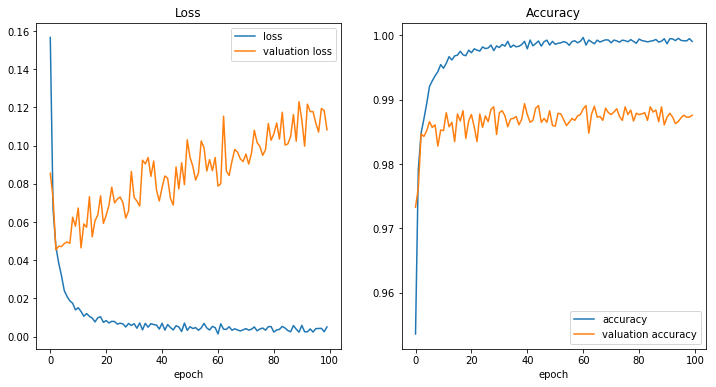

In [20]:
history=result.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [21]:
Y_pred=np.argmax(model.predict(X_test),axis=1)
np.mean(Y_pred==test_labels)

0.9876